In [105]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [106]:
sourceFilesPrefix="ExpectedResults//speech-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [107]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    # la cost se adauga 1/norma de W, 
    # se schimba gradientul pentru noua expresie
    return grad

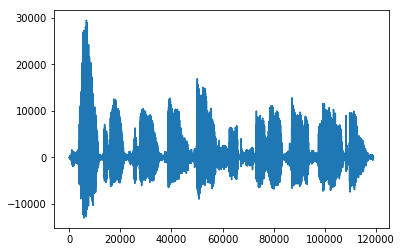

In [108]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

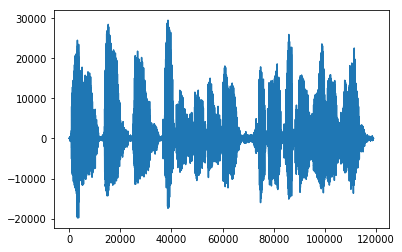

In [109]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [110]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.8406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.15270211  0.8406566 ]
 [ 0.90514896  0.53725471]]


In [111]:
print("Correlation coefficient - original data \n" + str(np.corrcoef(s1data,s2data)))
print(np.correlate(np.ravel(s1data),np.ravel(s2data)))
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))
print(np.correlate(np.ravel(X[0]),np.ravel(X[1])))

Correlation coefficient - original data 
[[ 1.         -0.00423728]
 [-0.00423728  1.        ]]
[-504.12514754]
Correlation coefficient - mixed data 
[[ 1.          0.65361556]
 [ 0.65361556  1.        ]]
[ 69754.81131502]


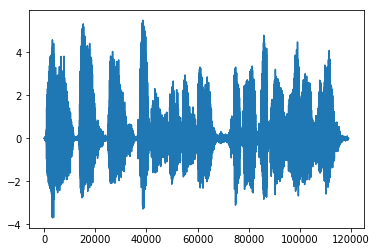

In [112]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [113]:
Audio(data=X[0], rate=16000)

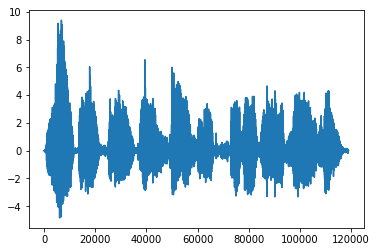

In [114]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [115]:
Audio(data=X[1], rate=16000)

In [116]:
corr=1
while abs(corr)>=9e-8:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    #corr=np.correlate(np.ravel(Y2[0]),np.ravel(Y2[1]))
    corr=np.corrcoef(Y2)[1][0]
    #print(np.corrcoef(Y2))
    print(corr)

Initial guessed decomposition matrix: 
[[ 0.00523764  0.00568858]
 [ 0.00963724  0.00412912]]
-6.53698510188e-07
Initial guessed decomposition matrix: 
[[ 0.00675508  0.0016686 ]
 [ 0.00495102  0.00949304]]
-1.27163931881e-06
Initial guessed decomposition matrix: 
[[ 0.00084745  0.00286496]
 [ 0.0079052   0.00563532]]
7.10611487988e-07
Initial guessed decomposition matrix: 
[[ 0.00056663  0.00711173]
 [ 0.00985039  0.00422742]]
-5.75804676008e-08


[[-0.00355482  0.0051207 ]
 [ 0.00525596 -0.00060542]]


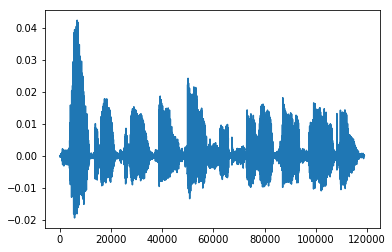

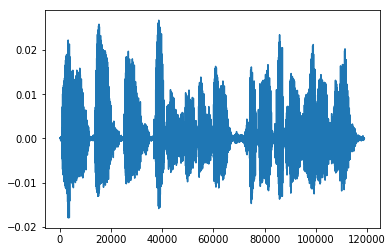

In [117]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [118]:
Audio(data=Y2[0], rate=16000)

In [119]:
Audio(data=Y2[1], rate=16000)

In [120]:
# minimizare sau maximiare ?
# minimizare norma de W, dot(W.T, W)

#plotare functie de cost